In [2]:
#importing packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm

In [3]:
#loading dataset 
data=pd.read_csv("loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#description of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#checking null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#filling the  null values 
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#displaying different rows
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
266,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban,Y
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
556,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,1.0,Urban,Y
148,LP001519,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N
371,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y


In [8]:
#converting the column data into integers 
data['Dependents']=data['Dependents'].replace(to_replace="3+",value='4')

In [9]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype(int)
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype(int)
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}).astype(int)
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Rural':1,'Semiurban':0}).astype(int)
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype(int)


In [10]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [11]:
#removing unwanted columns
data=data.drop('Loan_ID',axis=1)

In [12]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


Loan_Status    0    1
Gender               
0             37   75
1            155  347


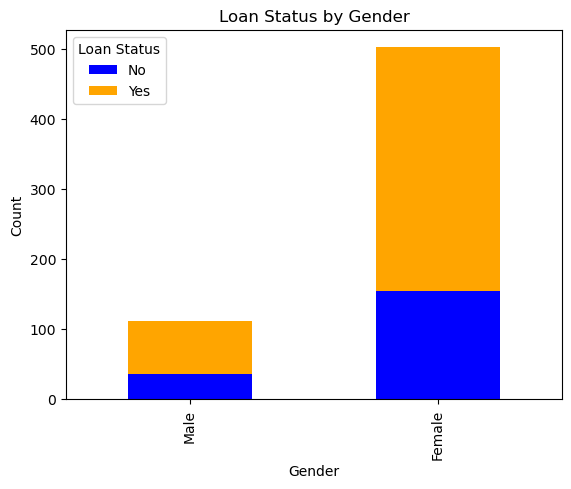

In [13]:
count_data = data.groupby(['Gender', 'Loan_Status']).size().unstack(fill_value=0)
print(count_data)
# Plot the grouped bar plot
count_data.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Status by Gender')

# Show legend
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Male', 'Female'])

# Display the plot
plt.show()

Loan_Status    0    1
Education            
0             52   82
1            140  340


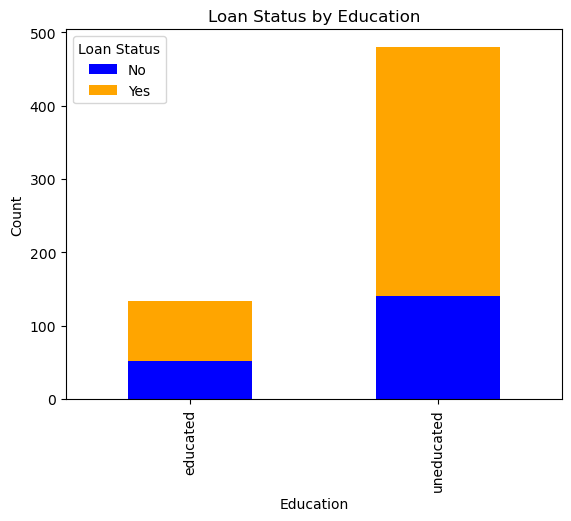

In [14]:
count_data = data.groupby(['Education', 'Loan_Status']).size().unstack(fill_value=0)
print(count_data)
# Plot the grouped bar plot
count_data.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Loan Status by Education')

# Show legend
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.xticks([0, 1], ['educated', 'uneducated'])

# Display the plot
plt.show()

Loan_Status      0    1
Self_Employed          
0              166  366
1               26   56


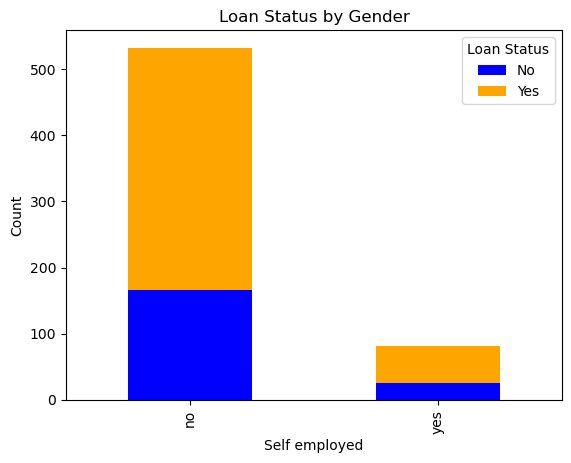

In [15]:
count_data = data.groupby(['Self_Employed', 'Loan_Status']).size().unstack(fill_value=0)
print(count_data)
# Plot the grouped bar plot
count_data.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Self employed')
plt.ylabel('Count')
plt.title('Loan Status by Gender')

# Show legend
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.xticks([0, 1], ['no', 'yes'])

# Display the plot
plt.show()

Loan_Status       0    1
Credit_History          
0.0              82    7
1.0             110  415


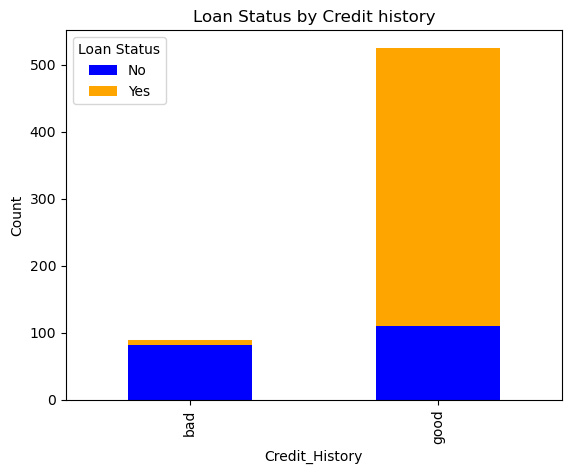

In [31]:
count_data = data.groupby(['Credit_History', 'Loan_Status']).size().unstack(fill_value=0)
print(count_data)
# Plot the grouped bar plot
count_data.plot(kind='bar', stacked=True, color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Loan Status by Credit history')

# Show legend
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.xticks([0, 1], ['bad', 'good'])

# Display the plot
plt.show()

In [17]:
count_data = data.groupby(['LoanAmount', 'Loan_Status']).size().unstack(fill_value=0)
print(count_data)

Loan_Status  0  1
LoanAmount       
9.0          1  0
17.0         0  1
25.0         0  2
26.0         0  1
30.0         0  2
...         .. ..
500.0        1  0
570.0        1  0
600.0        0  2
650.0        0  1
700.0        0  1

[204 rows x 2 columns]


In [18]:
#separating independent values
x=data.drop('Loan_Status',axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [19]:
#separating dependent columns
y=data['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [20]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [21]:
# standard the columns in specific range
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [22]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,0.000000,0.273231,1.0,2
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,1
2,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2
3,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2
4,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.898095,0.273231,1.0,1
610,1,1,4,1,0,-0.212557,-0.554487,-1.267279,-2.522836,1.0,1
611,1,1,1,1,0,0.437174,-0.472404,1.269371,0.273231,1.0,2
612,1,1,2,1,0,0.357064,-0.554487,0.483367,0.273231,1.0,2


In [23]:
#importing packages related to datasplit and accuracy calculation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [24]:
# function to split and calculate accuracy according to model
model_df={}
def model_val(modal,x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    modal.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score=cross_val_score(model,x,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [25]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_val(model,x,y)

LogisticRegression() accuracy is 0.7886178861788617
LogisticRegression() Avg cross val score is 0.8078368652538984


In [26]:
# support vector machine
from sklearn import svm
model=svm.SVC()
model_val(model,x,y)

SVC() accuracy is 0.7886178861788617
SVC() Avg cross val score is 0.7964147674263627


In [27]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model_val(model,x,y)


RandomForestClassifier() accuracy is 0.7723577235772358
RandomForestClassifier() Avg cross val score is 0.7817539650806344


In [28]:
# Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model_val(model,x,y)

GradientBoostingClassifier() accuracy is 0.7642276422764228
GradientBoostingClassifier() Avg cross val score is 0.7768759163001466


In [29]:
# results of the cross value table
model_df

{LogisticRegression(): 80.78,
 SVC(): 79.64,
 RandomForestClassifier(): 78.18,
 GradientBoostingClassifier(): 77.69}

In [30]:
max_model, max_accuracy = max(model_df.items(), key=lambda x: x[1])

print(f"The model with the maximum accuracy is {max_model} with an accuracy of {max_accuracy:.2f}%.")

The model with the maximum accuracy is LogisticRegression() with an accuracy of 80.78%.
